In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import(
    ensemble,
    preprocessing,
    tree,
)
from sklearn.metrics import(
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)
from yellowbrick.classifier import(
    ConfusionMatrix,
    ROCAUC,
)
from yellowbrick.model_selection import (
    LearningCurve,
)

In [5]:
# Essa célula pode ser utilizada depois dos dados estarem consolidados
# URL para pegar os dados
url = "/Brazil Total highway crashes 2010 - 2023.csv"
# Realiza o download dos dados
df = pd.read_csv(url)
# Faz uma cópia dos dados originais
orig_df = df

<ipython-input-5-a6e8ba32ae23>:5: DtypeWarning: Columns (9,11,12,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [6]:
df['lugar_acidente'].unique()

array(['Rodovia do Aço', 'Autopista Regis Bittencourt', 'Concepa',
       'Autopista Planalto Sul', 'Autopista Litoral Sul', 'Concer',
       'Novadutra', 'Autopista Fernão Dias', 'Autopista Fluminense',
       'Transbrasiliana', 'Crt', 'Via Bahia', 'Ecosul', 'ECO101',
       'Concebra', 'Cro', 'ECO050', 'VIA040', 'MSVIA', 'Ecoponte',
       'Via Sul', 'Ecovias do Cerrado', 'Via Costeira', 'Ecoriominas',
       'Via Brasil', 'RIOSP', 'Ecovias do Araguaia'], dtype=object)

In [7]:
df = df[df['lugar_acidente'] == 'Autopista Fernão Dias']
df

,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,lugar_acidente,tipo_de_acidente,automovel,...,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos
19,01/01/2010,07:32:00,51,sem vítima,54,BR-381/SP,Norte,Autopista Fernão Dias,Colisão Traseira,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
20,01/01/2010,07:47:00,53,sem vítima,493,BR-381/MG,Sul,Autopista Fernão Dias,"Choque - Defensa, barreira ou ""submarino""",1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
21,01/01/2010,11:25:00,102,com vítima,64,BR-381/SP,Sul,Autopista Fernão Dias,Capotamento,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN
22,01/01/2010,08:28:00,62,sem vítima,73,BR-381/SP,Norte,Autopista Fernão Dias,Saida de Pista,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
23,01/01/2010,14:20:00,139,sem vítima,76,BR-381/SP,Sul,Autopista Fernão Dias,"Choque - Defensa, barreira ou ""submarino""",1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,31/12/2022,16:04:38,299,Sem vítima,"46,764",BR-381/MG,Crescente,Autopista Fernão Dias,Choque,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
864448,31/12/2022,14:39:49,266,Sem vítima,"516,240",BR-381/MG,Decrescente,Autopista Fernão Dias,Capotamento,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
864449,31/12/2022,14:12:20,259,Sem vítima,"527,100",BR-381/MG,Decrescente,Autopista Fernão Dias,Choque,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
864466,31/12/2022,13:06:00,239,Sem vítima,"924,700",BR-381/MG,Decrescente,Autopista Fernão Dias,Queda de moto,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.drop(['lugar_acidente'], axis=1, inplace=True)


<ipython-input-8-64b13e9438f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['lugar_acidente'], axis=1, inplace=True)


In [9]:
df['tipo_de_acidente'].value_counts()

Colisão Traseira                             20380
Choque - Defensa, barreira ou "submarino"    16788
Capotamento                                  10791
Colisão Lateral                               8362
Choque - Elemento de Drenagem                 8138
Engavetamento                                 6680
Tombamento                                    6132
Outros - Sequência                            5689
Saida de Pista                                5137
Choque                                        3271
Queda de Moto                                 3269
Choque - Talude                               2272
Colisão traseira                              1606
Atropelamento de Animal                       1454
Choque - Suporte de Sinalização               1251
Outros                                         934
Colisão lateral no mesmo sentido               913
Choque - Outros                                828
Atropelamento - Morador                        755
Colisão Frontal                

In [10]:
df.columns

Index(['data', 'horario', 'n_da_ocorrencia', 'tipo_de_ocorrencia', 'km',
       'trecho', 'sentido', 'tipo_de_acidente', 'automovel', 'bicicleta',
       'caminhao', 'moto', 'onibus', 'outros', 'tracao_animal',
       'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios',
       'ilesos', 'levemente_feridos', 'moderadamente_feridos',
       'gravemente_feridos', 'mortos'],
      dtype='object')

In [11]:
#merge coluna data e hora no formato datetime
df['data_hora'] = pd.to_datetime(orig_df['data'] + ' ' + orig_df['horario'], format='%d/%m/%Y %H:%M:%S')
df

<ipython-input-11-98498d6c849d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_hora'] = pd.to_datetime(orig_df['data'] + ' ' + orig_df['horario'], format='%d/%m/%Y %H:%M:%S')


,data,horario,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,01/01/2010,07:32:00,51,sem vítima,54,BR-381/SP,Norte,Colisão Traseira,2.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2010-01-01 07:32:00
20,01/01/2010,07:47:00,53,sem vítima,493,BR-381/MG,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 07:47:00
21,01/01/2010,11:25:00,102,com vítima,64,BR-381/SP,Sul,Capotamento,1.0,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,2010-01-01 11:25:00
22,01/01/2010,08:28:00,62,sem vítima,73,BR-381/SP,Norte,Saida de Pista,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 08:28:00
23,01/01/2010,14:20:00,139,sem vítima,76,BR-381/SP,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,31/12/2022,16:04:38,299,Sem vítima,"46,764",BR-381/MG,Crescente,Choque,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,31/12/2022,14:39:49,266,Sem vítima,"516,240",BR-381/MG,Decrescente,Capotamento,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,31/12/2022,14:12:20,259,Sem vítima,"527,100",BR-381/MG,Decrescente,Choque,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,31/12/2022,13:06:00,239,Sem vítima,"924,700",BR-381/MG,Decrescente,Queda de moto,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [12]:
#drop colunas data e horario
df.drop(['data', 'horario'], axis=1, inplace=True)
df

<ipython-input-12-b2812286261a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['data', 'horario'], axis=1, inplace=True)


,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,51,sem vítima,54,BR-381/SP,Norte,Colisão Traseira,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2010-01-01 07:32:00
20,53,sem vítima,493,BR-381/MG,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 07:47:00
21,102,com vítima,64,BR-381/SP,Sul,Capotamento,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,2010-01-01 11:25:00
22,62,sem vítima,73,BR-381/SP,Norte,Saida de Pista,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 08:28:00
23,139,sem vítima,76,BR-381/SP,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,299,Sem vítima,"46,764",BR-381/MG,Crescente,Choque,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,266,Sem vítima,"516,240",BR-381/MG,Decrescente,Capotamento,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,259,Sem vítima,"527,100",BR-381/MG,Decrescente,Choque,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,239,Sem vítima,"924,700",BR-381/MG,Decrescente,Queda de moto,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [13]:
df

,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,51,sem vítima,54,BR-381/SP,Norte,Colisão Traseira,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2010-01-01 07:32:00
20,53,sem vítima,493,BR-381/MG,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 07:47:00
21,102,com vítima,64,BR-381/SP,Sul,Capotamento,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,2010-01-01 11:25:00
22,62,sem vítima,73,BR-381/SP,Norte,Saida de Pista,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 08:28:00
23,139,sem vítima,76,BR-381/SP,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,299,Sem vítima,"46,764",BR-381/MG,Crescente,Choque,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,266,Sem vítima,"516,240",BR-381/MG,Decrescente,Capotamento,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,259,Sem vítima,"527,100",BR-381/MG,Decrescente,Choque,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,239,Sem vítima,"924,700",BR-381/MG,Decrescente,Queda de moto,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [14]:
#change NaN to 0
df.fillna(0, inplace=True)
df

<ipython-input-14-d2d1aaaaf138>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


,n_da_ocorrencia,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,51,sem vítima,54,BR-381/SP,Norte,Colisão Traseira,2.0,0.0,0,0,...,0.0,0,0.0,0,2.0,0.0,0.0,0.0,0.0,2010-01-01 07:32:00
20,53,sem vítima,493,BR-381/MG,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0,0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 07:47:00
21,102,com vítima,64,BR-381/SP,Sul,Capotamento,1.0,0.0,0,0,...,0.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,2010-01-01 11:25:00
22,62,sem vítima,73,BR-381/SP,Norte,Saida de Pista,1.0,0.0,0,0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 08:28:00
23,139,sem vítima,76,BR-381/SP,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0,0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,299,Sem vítima,"46,764",BR-381/MG,Crescente,Choque,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,266,Sem vítima,"516,240",BR-381/MG,Decrescente,Capotamento,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,259,Sem vítima,"527,100",BR-381/MG,Decrescente,Choque,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,239,Sem vítima,"924,700",BR-381/MG,Decrescente,Queda de moto,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [15]:
df.drop(['n_da_ocorrencia'], axis=1, inplace=True)
df

<ipython-input-15-02bdfced6541>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['n_da_ocorrencia'], axis=1, inplace=True)


,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,sem vítima,54,BR-381/SP,Norte,Colisão Traseira,2.0,0.0,0,0,0.0,...,0.0,0,0.0,0,2.0,0.0,0.0,0.0,0.0,2010-01-01 07:32:00
20,sem vítima,493,BR-381/MG,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0,0,0.0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 07:47:00
21,com vítima,64,BR-381/SP,Sul,Capotamento,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,2010-01-01 11:25:00
22,sem vítima,73,BR-381/SP,Norte,Saida de Pista,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 08:28:00
23,sem vítima,76,BR-381/SP,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0,0,0.0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,Sem vítima,"46,764",BR-381/MG,Crescente,Choque,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,Sem vítima,"516,240",BR-381/MG,Decrescente,Capotamento,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,Sem vítima,"527,100",BR-381/MG,Decrescente,Choque,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,Sem vítima,"924,700",BR-381/MG,Decrescente,Queda de moto,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [16]:
df['trecho'].value_counts()

BR-381/MG         84425
BR-381/SP         23612
BR-381/MG-CONT      459
Name: trecho, dtype: int64

In [17]:
df['tipo_de_ocorrencia'].value_counts()

sem vítima                          63459
com vítima                          27989
Sem vítima                           7566
3 - Acidente com Danos Materiais     6563
2 - Acidente com VITIMA              2660
1 - Acidente com Vitima Fatal         148
Com vítima                            111
Name: tipo_de_ocorrencia, dtype: int64

In [18]:
#find columns with string values
df.select_dtypes(include=['object']).columns


Index(['tipo_de_ocorrencia', 'km', 'trecho', 'sentido', 'tipo_de_acidente',
       'automovel', 'caminhao', 'moto', 'transporte_de_cargas_especiais',
       'utilitarios', 'ilesos'],
      dtype='object')

In [19]:
#column km to float
df['km'] = df['km'].str.replace(',', '.').astype(float)
df

<ipython-input-19-fdaa0d077330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km'] = df['km'].str.replace(',', '.').astype(float)


,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,sem vítima,54.000,BR-381/SP,Norte,Colisão Traseira,2.0,0.0,0,0,0.0,...,0.0,0,0.0,0,2.0,0.0,0.0,0.0,0.0,2010-01-01 07:32:00
20,sem vítima,493.000,BR-381/MG,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0,0,0.0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 07:47:00
21,com vítima,64.000,BR-381/SP,Sul,Capotamento,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,2010-01-01 11:25:00
22,sem vítima,73.000,BR-381/SP,Norte,Saida de Pista,1.0,0.0,0,0,0.0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 08:28:00
23,sem vítima,76.000,BR-381/SP,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0,0,0.0,...,0.0,0,0.0,0,1.0,0.0,0.0,0.0,0.0,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,Sem vítima,46.764,BR-381/MG,Crescente,Choque,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,Sem vítima,516.240,BR-381/MG,Decrescente,Capotamento,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,Sem vítima,527.100,BR-381/MG,Decrescente,Choque,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,Sem vítima,924.700,BR-381/MG,Decrescente,Queda de moto,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [20]:
for i in ['automovel', 'caminhao', 'moto', 'transporte_de_cargas_especiais','utilitarios', 'ilesos']:
    df[i] = df[i].astype(float)
    print(df[i].value_counts())
df

<ipython-input-20-9786914dee13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(float)
<ipython-input-20-9786914dee13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(float)
<ipython-input-20-9786914dee13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

1.0     61070
0.0     33055
2.0     10484
3.0      2634
4.0       823
5.0       279
6.0        97
7.0        40
8.0         9
9.0         3
12.0        1
15.0        1
Name: automovel, dtype: int64
0.0    80048
1.0    22869
2.0     5113
3.0      382
4.0       63
5.0       14
6.0        5
7.0        2
Name: caminhao, dtype: int64
0.0    97336
1.0    10860
2.0      291
3.0        8
4.0        1
Name: moto, dtype: int64
0.0    108496
Name: transporte_de_cargas_especiais, dtype: int64
0.0    97859
1.0    10192
2.0      426
3.0       18
4.0        1
Name: utilitarios, dtype: int64
1.0      47707
2.0      29638
0.0      15965
3.0       8158
4.0       3770
         ...  
116.0        1
91.0         1
62.0         1
58.0         1
60.0         1
Name: ilesos, Length: 61, dtype: int64


<ipython-input-20-9786914dee13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype(float)


,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,sem vítima,54.000,BR-381/SP,Norte,Colisão Traseira,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2010-01-01 07:32:00
20,sem vítima,493.000,BR-381/MG,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 07:47:00
21,com vítima,64.000,BR-381/SP,Sul,Capotamento,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2010-01-01 11:25:00
22,sem vítima,73.000,BR-381/SP,Norte,Saida de Pista,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 08:28:00
23,sem vítima,76.000,BR-381/SP,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,Sem vítima,46.764,BR-381/MG,Crescente,Choque,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,Sem vítima,516.240,BR-381/MG,Decrescente,Capotamento,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,Sem vítima,527.100,BR-381/MG,Decrescente,Choque,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,Sem vítima,924.700,BR-381/MG,Decrescente,Queda de moto,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [21]:
df.select_dtypes(include=['object']).columns

Index(['tipo_de_ocorrencia', 'trecho', 'sentido', 'tipo_de_acidente'], dtype='object')

In [22]:
#find columns with int values
df[['tipo_de_ocorrencia', 'trecho', 'sentido', 'tipo_de_acidente']].select_dtypes(include=['int64']).columns

Index([], dtype='object')

In [23]:
df

,tipo_de_ocorrencia,km,trecho,sentido,tipo_de_acidente,automovel,bicicleta,caminhao,moto,onibus,...,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,sem vítima,54.000,BR-381/SP,Norte,Colisão Traseira,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2010-01-01 07:32:00
20,sem vítima,493.000,BR-381/MG,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 07:47:00
21,com vítima,64.000,BR-381/SP,Sul,Capotamento,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2010-01-01 11:25:00
22,sem vítima,73.000,BR-381/SP,Norte,Saida de Pista,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 08:28:00
23,sem vítima,76.000,BR-381/SP,Sul,"Choque - Defensa, barreira ou ""submarino""",1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,Sem vítima,46.764,BR-381/MG,Crescente,Choque,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,Sem vítima,516.240,BR-381/MG,Decrescente,Capotamento,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,Sem vítima,527.100,BR-381/MG,Decrescente,Choque,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,Sem vítima,924.700,BR-381/MG,Decrescente,Queda de moto,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [24]:
df.drop(['tipo_de_ocorrencia', 'trecho', 'sentido', 'tipo_de_acidente'], axis=1, inplace=True)

<ipython-input-24-6ba6c308494b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['tipo_de_ocorrencia', 'trecho', 'sentido', 'tipo_de_acidente'], axis=1, inplace=True)


In [25]:
df

,km,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,data_hora
19,54.000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2010-01-01 07:32:00
20,493.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 07:47:00
21,64.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2010-01-01 11:25:00
22,73.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 08:28:00
23,76.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2010-01-01 14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,46.764,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 16:04:38
864448,516.240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:39:49
864449,527.100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-31 14:12:20
864466,924.700,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-31 13:06:00


In [26]:
#get just time from datetime
df['hora'] = df['data_hora'].dt.time
df.drop(['data_hora'], axis=1, inplace=True)
df

<ipython-input-26-91c6d68f5e0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hora'] = df['data_hora'].dt.time
<ipython-input-26-91c6d68f5e0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['data_hora'], axis=1, inplace=True)


,km,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,hora
19,54.000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,07:32:00
20,493.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,07:47:00
21,64.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11:25:00
22,73.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,08:28:00
23,76.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,46.764,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16:04:38
864448,516.240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14:39:49
864449,527.100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14:12:20
864466,924.700,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13:06:00


In [27]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.9 MB/s eta 0:00

In [28]:
from pycaret.regression import *

In [29]:
df_to_model = df.copy()
df_to_model.drop(['ilesos', 'levemente_feridos', 'moderadamente_feridos', 'gravemente_feridos'],  axis=1, inplace=True)

In [30]:
df_to_model

,km,automovel,bicicleta,caminhao,moto,onibus,outros,tracao_animal,transporte_de_cargas_especiais,trator_maquinas,utilitarios,mortos,hora
19,54.000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,07:32:00
20,493.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,07:47:00
21,64.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11:25:00
22,73.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,08:28:00
23,76.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864447,46.764,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16:04:38
864448,516.240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14:39:49
864449,527.100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14:12:20
864466,924.700,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13:06:00


In [31]:
df_to_model['mortos'].value_counts()

0.0    106811
1.0      1524
2.0       130
3.0        18
4.0         6
5.0         4
8.0         1
7.0         1
6.0         1
Name: mortos, dtype: int64

In [32]:
setup(df_to_model,target='mortos', use_gpu=True)



[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,6737
1,Target,mortos
2,Target type,Regression
3,Original data shape,"(108496, 13)"
4,Transformed data shape,"(108496, 13)"
5,Transformed train set shape,"(75947, 13)"
6,Transformed test set shape,"(32549, 13)"
7,Numeric features,11
8,Categorical features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [33]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0344,0.0229,0.1509,-0.0002,0.0934,0.9835,0.8790
omp,Orthogonal Matching Pursuit,0.0344,0.0229,0.1509,-0.0002,0.0934,0.9834,0.9710
en,Elastic Net,0.0344,0.0229,0.1509,-0.0002,0.0934,0.9835,0.7240
dummy,Dummy Regressor,0.0344,0.0229,0.1509,-0.0002,0.0934,0.9835,0.8950
llar,Lasso Least Angle Regression,0.0344,0.0229,0.1509,-0.0002,0.0934,0.9835,0.7200
huber,Huber Regressor,0.0174,0.0232,0.1519,-0.0134,0.0939,1.0000,2.2580
ridge,Ridge Regression,0.0396,0.0233,0.1524,-0.0200,0.0960,0.9701,0.9590
br,Bayesian Ridge,0.0399,0.0234,0.1526,-0.0222,0.0962,0.9700,0.8710
lar,Least Angle Regression,0.0400,0.0234,0.1526,-0.0225,0.0962,0.9699,0.9730
lr,Linear Regression,0.0400,0.0234,0.1526,-0.0225,0.0962,0.9699,1.6690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Lasso(random_state=6737)

In [34]:
model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0305,0.0216,0.1471,-0.0559,0.0896,0.9446
1,0.0332,0.0204,0.1430,-0.0635,0.0945,0.9563
2,0.0338,0.0230,0.1515,-0.0399,0.0978,0.9577
3,0.0375,0.0273,0.1652,-0.0629,0.1056,0.9627
4,0.0320,0.0197,0.1404,-0.0054,0.0934,0.9387
5,0.0354,0.0245,0.1565,-0.0613,0.1021,0.9491
6,0.0357,0.0286,0.1691,-0.0285,0.1029,0.9577
7,0.0344,0.0288,0.1698,-0.0385,0.0972,0.9541
8,0.0358,0.0241,0.1553,-0.0558,0.1009,0.9511


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
tuned_model = tune_model(model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:00:24
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: ignored

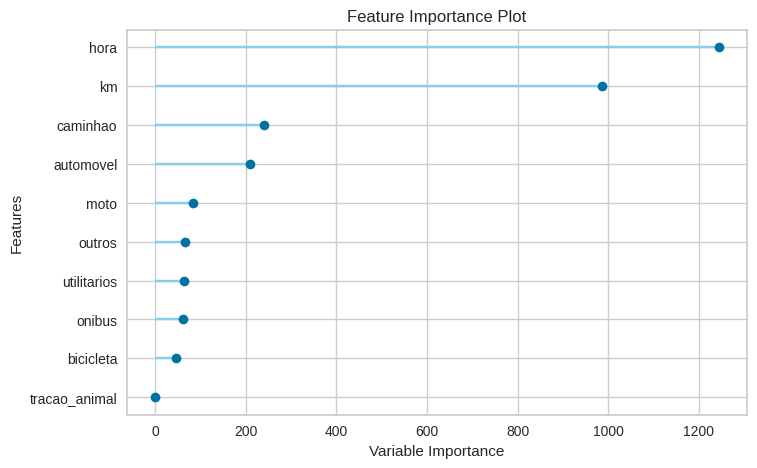

In [37]:
plot_model(model, plot='feature')

In [39]:
final_model = finalize_model(model)

In [ ]:
model

In [ ]:
final_model

In [40]:
save_model(final_model, 'lgbmregressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['km', 'automovel', 'bicicleta',
                                              'caminhao', 'moto', 'onibus',
                                              'outros', 'tracao_animal',
                                              'transporte_de_cargas_especiais',
                                              'trator_maquinas', 'utilitarios'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['hora'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['hora'],
                                     transformer=TargetEncoder(cols=['hora'],
                                                               handle_missing='return_nan'))),
              

In [51]:
!pip install pycaret[mlops]

In [49]:
!pip install fastapi

In [43]:
final_model = load_model("/content/lgbmregressor")

Transformation Pipeline and Model Successfully Loaded


In [47]:
import fastapi

In [55]:
create_api(final_model, "lgbmrAPI")

ModuleNotFoundError: ignored

In [ ]:
create_docker("/content/lgbmrAPI.pkl")

In [ ]:
!docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .